<a href="https://colab.research.google.com/github/gocoderone/alpha/blob/master/Coder_One_Alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thank you for being a part of our Alpha Test! 🙌

We're on a mission to build the future home of 'AI Sports', showcasing the most talented minds in tech and connect them with top tech companies. Your feedback will be immensely helpful to us in designing a better experience for our users at [Coder One](https://gocoder.one)!

This notebook will walk you through the steps to get your first bot up and running in our original AI multiplayer game (codename: Rook). At the end of it, we'd love to get 15 minutes of your time to complete a quick survey or have a chat with us to get your feedback. This will help us better understand what you're looking for from the AI Sports platform we're building at Coder One.

To thank you for your time and feedback, we'll gift you some custom swag at our [AI Sports Challenge](https://gocoder.one/aisports). 🙏

Ready? Let's get started! 🦾🤖

# Rook 🏰

> *You've found yourself in a castle filled with traps... and treasures! Unfortunately you're not the only one here... and who knows how long these crumbling floors will hold up?*

In **Rook** you control an explorer navigating an abandoned castle. Your goal is to destroy as many treasure-containing blocks as possible within the time limit - while avoiding getting hit yourself!

![Rook - try refreshing the page to load the image correctly](https://drive.google.com/uc?id=1noFmhedkc8pzGWlxhiDcLoXZADkhveYs)

##Game rules
*   Each game lasts **200** turns. If you manage to make it to the end of the game safely, the winner is determined by the number of **points** you've scored.
*   Score points by destroying blocks. Destroy blocks using bombs. Each block destroyed grants you **+1 point**.
*   On each turn, you can either move up ⬆️, left ⬅️, down ⬇️ or right ➡️, place a bomb 💣, or do nothing. Making an invalid move (i.e. walking into a tile with a hole, block, or other player) will **lose you 10 points**.
*   In this version of the game, you can place up to **1** bomb at any one time. Bombs will explode **5** turns after they've been placed, and destroy any player or blocks to the immediate top, left, right or left-side of it.


## Environment information
Note that this game environment and your agent's code will need to be written in **Python**.

This section contains some useful information on the environment, which you'll need to communicate with the game to control your bot (aka your 'agent'). Feel free to skim through this part for now, and come back to it later when you need more details to code your bot.

### Map 🗺️
The map in this game is represented by a numpy **array**. It is fed to your agent as the variable 'state', containing all the information about the current state of the game map. Each value in the array corresponds to a certain object on the map:

```
0: empty tile
1: player 1 (pink)
2: player 2 (orange)
3: destructible block
4: hole / indestructible block
5: bomb
6: both player 1 and a bomb on the tile
7: both player 2 and a bomb on the tile
8: an exploding bomb
9: a tile within range of a bomb's explosion
```
Below is an example of the array your agent receives each turn.

![Map representation - try refreshing the page to load the image correctly](https://drive.google.com/uc?id=1HieLyzwGMlBAPEnpiada2wbaBn5yZirE)

Interpreting the map correctly will be critical for implementing your bot's strategy!

### Actions 🕹️
Actions are represented by a **number** value:

```
DO NOTHING = 0
MOVE LEFT = 1
MOVE RIGHT = 2
MOVE UP = 3
MOVE DOWN = 4
PLACE A BOMB = 5
```
You must return a **number** value corresponding to the action you wish to make.
Note that trying to make an illegal move (see **game rules** above) will lose you points.


### Objects and classes 
There are two types of objects with unique properties that are available for you to call on: the **agents** (both yours and your opponent's), and the **bombs** on the map.

*   **Agents/players** 🤖

The class object 'player' has the following properties:

```
number: Either 0 or 1, corresponds to player 1 and player 2 (type: int)
position: The current position of the agent, as an (x,y) index of the map (type: tuple)
bombs: Bomb objects that the agent has placed on the board, as a list (type: class object)
num_bombs: Number of bombs the agent has available to place on the board (type: int)
score: The current score of that agent (type: int)
```

*   **Bombs** 💣

The bombs placed on the map are stored in the player's "bombs" property as a list. Each individual bomb is a class object with the following properties:

```
timer: (type: int)
    The current timer left on the bomb. 
    Once this reaches 0, it will explode after both agents have completed their turns.
position: (type: tuple)
    The current position of that bomb on the map as an (x,y) index of the map.
owned_by: (type: int)
    Which player originally placed the bomb. 
    Either 1 or 2, corresponding to the player number.
recently_exploded: (type: Bool)
    True if the the bomb exploded on the previous turn. 
    False otherwise.
tiles_in_range: (type: list (of tuples))
    The tiles that will be destroyed once this bomb explodes.
```


# Installation 💽

For this Alpha test tutorial, you can choose to either follow along within this notebook, or run it locally on your own computer. Note that if you're running it locally, we've only tested it for compatibility with Windows and Linux. 

1. Start by copying this notebook to your own drive by clicking the 'Copy to Drive' button on the header bar ☝️

2. Head over to our Github repo: https://github.com/gocoderone/alpha and download the 'coder_one_alpha_v02.zip' file. This package contains all the Python scripts for the game.



In [ ]:
! git clone --recursive https://github.com/gocoderone/alpha.git

Cloning into 'alpha'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 32 (delta 14), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (32/32), done.


**Option 1:** Mount your Google Drive (More reliable but takes more time to set up)
1. Upload the 'coder_one_alpha_v02.zip' file to your main Google Drive.


3. Install some dependancies. You can do this by simply running the cells below (Shift + Enter or just click the 'play' button when hovering over the cell).

In [ ]:
!pip install numpy # numpy is a popular Python package for working with arrays: https://numpy.org/
# below we're importing our python scripts into this Google Colab notebook for you to access
!cp "drive/My Drive/alpha_v02/bm_multi_env.py" .
!cp "drive/My Drive/alpha_v02/flee_agent.py" .
!cp "drive/My Drive/alpha_v02/lookahead_agent.py" .
!cp "drive/My Drive/alpha_v02/random_agent.py" .
!cp "drive/My Drive/alpha_v02/multi_agent_handler.py" .
!cp -r "drive/My Drive/alpha_v02/img/" .

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Option 2: Download the game package from our Github: 

In [3]:
%cd alpha

from bm_multi_env import * # our functions and methods for the game
import numpy as np # used to define our map
import lookahead_agent # our opponent bot
import random # used to help our bot sample random moves
from time import sleep # used to help with displaying the game
from IPython.display import display, clear_output   # used to help with displaying the game

[Errno 2] No such file or directory: 'alpha'
/content/alpha
/content/alpha


# Level 1: Getting Started 🥉 (30 min)
Our first goal will be to write your first bot and get you familiar with the game environment. Let's go!




**Step 1:** Start by **initiating** the Rook game environment. Do this by running the cell below.

In [ ]:
env = Game(5,7) # this will create the game environment, at a size of 5x7 tiles.

# Set the play time
num_episodes = 3    # The number of games we'll play. Best of 3 wins!
max_turns = 200     # The number of steps or turns our bots will make before the game ends.

# Set the bots in play
agent2 = lookahead_agent # This is our bot. You can take a look at the code behind this later :)

3. Let's run a test game! For this, we'll just walk you through creating a bot that will just choose moves at random. 

First, we need to choose an action for our bot to take.

In [ ]:
# this is a list of the available actions you can take.
# each value corresponds to a move (see game rules above)
# 0 = do nothing, 1 = move left, 2 = move right, 3 = move up, 4 = move down, 5 = place a bomb
list_of_actions = [0,1,2,3,4,5]

In [ ]:
# this is the action we'll tell our bot to do.
# for our random bot, we're just going to sample a random action from the list available.
# if you're already familiar with Python, have a go at filling in the line below
# (or move on to the block below for spoilers)
action = None # change this

We'll wrap the code above inside of a function that our game will call on each turn to see what move our bot wants to take.

In [ ]:
# this is the function that will define our bot's behaviour
# each turn, the game will call this function and expect an action 
def agent(state, done, bombs, turn, player):

  # your bot will receive some information from the game environment that it can use to process its next move.
  # we'll skip this for now.

	name = "a bot has no name" # name your bot! 
	list_of_actions = [0,1,2,3,4,5]
	action = random.choice(list_of_actions)
	return action, name

Below is the general structure for running the game. It will call on the function we just defined earlier.

Have a read-through if you wish (but not necessary, you've done all the hard work in coding your bot already), then run the block to watch your random bot play! (You will play as the Pink bot starting on the left)

![Player 1 - try refreshing the page to load the image correctly](https://drive.google.com/uc?id=1YfQ_5Eib5s0QOAtBtSkMLUCT3tGf5jOI)

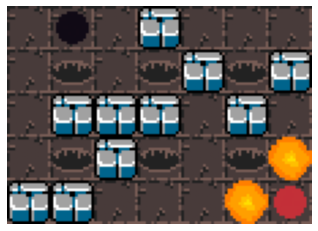

 Game over. a bot has no name wins.


In [ ]:
# we'll play 3 games in total 
for _ in range(num_episodes):

	# initialize the map & players
	state, players = env.reset()
	
	# initialise some variables related to the bomb behaviour
	bomb_list = []
	bomb_timer = env.MAX_TIMER

	# initialize variables
	done = False					# indicates whether or not the game is over
	turn = 0							# tracks the number of turns in the game

	rewards = [0,0] 			# stores rewards received by agents per turn
	total_rewards = [0,0] # stores cumulative rewards received
	
	# play through the game until it ends
	while not done:

		clear_output(wait=True) # helps with displaying the game in Colab

		# get player one's action (you)
		p1_action, p1_bot = agent(state, done, bomb_list, turn, player=players[0])
		# get player two's action
		# this is our agent. You can take a look at the code behind this later :)
		p2_action, p2_bot = lookahead_agent.agent(state, done, bomb_list, turn, player=players[1])

		# collect actions made
		actions = [p1_action, p2_action]
		# perform the actions on the environment
		# receive back the new information from the environment
		state, done, players, bomb_list = env.step(actions)

		# render the game
		env.render(True) # set this to False to display the game in an ASCII format instead

		# game over print the results
		if done:
			if players[0].score > players[1].score:
				print(f" Game over. {p1_bot} wins.")
			elif players[0].score < players[1].score:
				print(f" Game over. {p2_bot} wins.")
			else:
				print("Game over. It's a tie.")
			sleep(3)
			break

		turn += 1 # update turn tracker

		sleep(1) # helps with displaying the game

Clearly not the smartest bot.
Here's where you come in - time to powerup your bot. 🦾🤖

# Level 2: Responding to the Environment 🥈 (1 hr)

Our previous bot chose an action at random, without thinking about what was going on around it at all. 

In this section, we'll walk you through a simple bot that:
1. Makes a random move
2. If it's placed a bomb on the board, it will try to find a tile nearby that will be safe to hide from the bomb.
3. If there was no where safe to go, it will just make a random move and hope for the best 🤞
4. Waits until the bomb has exploded before repeating steps 1 - 3.

**Step 1: Understand game environment variables**

This would be a good time to go back and check out the 'environment information' section at the start of this notebook.

In the previous section, you may have noticed that your agent function receives the following inputs from the game:

```
(state, done, bombs, turn, player)
```

The most important for you will likely be:

*   **state**: the current game map as a numpy array
*   **player**: your agent as an object with information such as your current position (as a tuple (x,y)), and any bombs you've placed on the map (as a list of tuple positions of the bombs).

We'll walk you through how to use these. Start by running the cell below to load a new game.

In [ ]:
# preloading some game information for you
env = Game(5,7)
state, players = env.reset()
player = players[0] # players contains information on both player 1 and player 2
                    # your agent will only receive information on player 1

# playing out some sequence of moves for you
actions = [5,0]
env.step(actions)
actions = [2,0]
state, _, players, _ = env.step(actions)

To give you an idea of what types of variable we're working with, run the cell below to print the output of the state and player:

In [ ]:
print(state)
print(player)

[[5 1 0 3 3 0 0]
 [0 4 3 4 0 4 3]
 [0 3 0 0 0 3 0]
 [3 4 3 4 0 4 0]
 [3 0 3 0 0 0 2]]


As you can see, the player is an object which we can't directly call to get any useful information from. Let's try and get the player's current position from this.

In [ ]:
curr_pos = player.position # 'position' is an attribute of the 'player' class object
print(curr_pos)

(0, 1)


Nice 🙂 We got (0,1) which is an (x,y) index of the map meaning row 0, column 1. You can see that in the state array, it shows the value '1' which corresponds to Player 1 (you).

To get you more familiar, here are some examples of useful calls for you to fill out:

In [ ]:
# get your player number (hint: check the Environment Information section)
# it is represented by an attribute 'number' of the class object 'player'
player_number = None # change this

print(player_number) # this should return '0'

None


In [ ]:
# return the position of the bomb your agent placed
# bombs are stored in the 'bombs' attribute of the class object 'player'
# first, print the list of bombs your player has placed
bomb_list = None # change this

print(bomb_list) # this should print a list of bomb objects

In [ ]:
# next, get the position of this bomb object
# the position is stored in the 'position' attribute of the class object 'bomb'
# (hint: you'll need to grab the first bomb object in the list)
bomb_pos = None # change this

print(bomb_pos) # this should return (0,0)

None


In [ ]:
# here's a one-line way of repeating the above:
bomb_pos = player.bombs[0].position
print(bomb_pos)

(0, 0)


In [ ]:
# finally, let's return the value of a certain tile of the map
# let's say, the tile at (1,1)
value_at_1_1 = state[None] # change this
print(value_at_1_1) # this should return '4' i.e. a hole on the map

4


In [ ]:
# we can combine the techniques above to return the state of the map, i.e.:
print(state[player.position]) # returns 1 (i.e. player 1 on a tile)

1


**Step 2: Define helper functions**

Great! Now that we're more familiar with the game environment, we're going to define some helper functions that will help our bot understand information from the game environment.

Firstly, in order for our bot to make effective moves, it will need to know what its immediate surroundings are. Our first helper function, will return us a list of of our surrounding tiles.

To do this, we'll take advantage of the array-representation of the map:

![Position indices - try refreshing the page to load the image correctly](https://drive.google.com/uc?id=183tKV4JdEC7KizP0QxnIb0WSiDQ38ePT)

In the code below, we've left you some gaps to fill out. Don't worry if you get stuck - we'll provide you with the full code at the end of this section.

In [ ]:
# given a tile location as an (x,y) tuple, this function
# will return the surrounding tiles up, down, left and to the right as a list
# (i.e. [(x1,y1), (x2,y2),...])
# as long as they do not cross the edge of the map
def get_surrounding_tiles(state, position):

	# store some useful information about our environment
	rows = state.shape[0]
	cols = state.shape[1]

	# find all the surrounding tiles relative to us
	# position[0] = row index; position[1] = col index
	tile_up = (position[0]-1,position[1]) 
	tile_down = None 		 ################ FILL THIS ###################
	tile_left = None     ################ FILL THIS ###################
	tile_right = (position[0],position[1]+1)		 

	# combine these into a list
	surrounding_tiles = [tile_up, tile_down, tile_left, tile_right]

	# create a list to store tiles we can't move to
	# (ones that cross the borders of the map, and holes)
	tiles_to_remove = [] 

	# loop through surrounding tiles
	for tile in surrounding_tiles:
		# i.e. that tile would go off the edge of the map
		if (tile[0] < 0 or tile[1] < 0 or tile[0] >= rows or tile[1] >= cols or 
			state[tile] == 4):
			# add illegal tiles to our list
			tiles_to_remove.append(tile)

	# loop through the tiles we're going to exclude
	# and remove them from our original list of tiles
	for tile in tiles_to_remove:
		surrounding_tiles.remove(tile)

	return surrounding_tiles

The 'get_surrounding_tiles' function will be useful for checking around us for any hazards.

In order for our bot to move effectively, it will also need to know which of these tiles are actually free (i.e. not containing a block or hole, or other player):

In [ ]:
# given a list of tiles
# return the ones which are actually empty
def get_empty_tiles(list_of_tiles):
  
  # make a list where we'll store our empty tiles
  empty_tiles = []

  for tile in list_of_tiles:
    if state[tile] == None: ################ FILL THIS ###################
                            # hint: which number corresponds to 'empty' on the map?
      # that tile is empty, so add it to the list
      empty_tiles.append(tile)

  return empty_tiles

Cool🙂 Now we want to build some 'smarts' into our bot. We don't want our bot to be moving into any tile that's within range of a bomb, so let's define a function that returns us some 'safe' tiles to move to. No need to fill out anything here, but feel free to read through the code to understand how we're doing this.

In [ ]:
# given a list of tiles, and the bomb's position on the map
# return only the tiles which are not within 1 tile of the bomb
def get_safe_tiles(list_of_tiles, bomb_pos):
  
  # make a list where we'll store our safe tiles 
  safe_tiles = []

  # loop the tiles
  for tile in list_of_tiles:
    # subtract the coordinates of the current tile and bomb
    # diff will give us the 'distance' to the bomb
    diff = tuple(x-y for x, y in zip(tile, bomb_pos)) 
    if diff in [(0,1),(1,0),(0,-1),(-1,0),(0,0)]:
      # this tile is adjacent to a bomb
      pass
    else:
      # otherwise, the tile should be safe
      safe_tiles.append(tile)

  return safe_tiles

Final helper function!

Now that we know which tiles we want to move to, we need a function that will actually return us the ***correct action which will move us there***.

In [ ]:
# given an adjacent tile location, move us there
def move_to_tile(position, tile):

  # a useful dictionary for our actions
  actions = ['none','left','right','up','down','bomb']
  action_id = [0,1,2,3,4,5]
  d_actions = dict(zip(actions,action_id))

  # see where the tile is relative to our current location
  diff = tuple(x-y for x, y in zip(position, tile))

  # return the action that moves in the direction of the tile
  if diff == (0,1):
    action = d_actions['left']
  elif diff == (1,0):
    action = None     ################ FILL THIS ###################
  elif diff == (0,-1):
    action = None     ################ FILL THIS ###################
  elif diff == (-1,0):
    action = d_actions['down']

  return action

**Step 3: Bring it all together!**

Hang in there - we're almost ready to watch our new bot play!

We've provided the skeleton code below to help you piece together your new bot.
Alternatively, our version of this 'flee' bot is available in the files as 'flee_agent.py'.

In [ ]:
%%writefile my_bot.py
def agent(state, done, bombs, turn, player):

	import random

	########################
	###    VARIABLES     ###
	########################

	# as player 1, the map representation of us standing on a tile with a bomb
	# is different to player 2's - so we'll store this value here for reference
	player_on_bomb_id = 6

	# you can also move some of the other variables out of the helper functions
	# such as dictionary of actions, or size of the map here if you wish

	########################
	###     HELPERS      ###
	########################

	# copy your helper functions here!

	########################
	###      AGENT       ###
	########################

	# first, check if we've placed some bombs on the map
	if player.bombs:
		# if our 'player' object has bomb objects on them
		# that means we've placed a bomb, so let's run away.

		# get the bomb's position
		bomb_pos = None			################ FILL THIS ################### 	

		# get a list of our surrounding tiles
		surrounding_tiles = get_surrounding_tiles(state, player.position)

		# get a list of the available tiles we can actually move to
		empty_tiles = None	################ FILL THIS ################### 

		# get a list of the safe tiles we should move to
		safe_tiles = None	################ FILL THIS ###################

		# check if we're on the bomb
		if state[player.position] == player_on_bomb_id:
			# we're on a bomb
			# let's move to an empty slot
			if empty_tiles:
				random_tile = random.choice(empty_tiles)
				action = move_to_tile(player.position, random_tile)
			else:
				# there aren't any empty tiles to go to
				# we're probably done for.
				action = d_actions['none']
		else:
			# we're not on a bomb
			# check if we're next to a bomb
			for tile in surrounding_tiles:
				if (tile[0] == bomb_pos[0]) and (tile[1] == bomb_pos[1]):
					# we're next to a bomb
					# move to a random safe tile (if there are any)
					if safe_tiles:
						random_tile = None	################ FILL THIS ###################
						action = None				################ FILL THIS ###################
						break
					else:
						# there isn't a guaranteed safe tile near us
						# choose a move at random
						action = d_actions[random.choice(actions)]
						break
			else:
				# there isn't a bomb nearby
				# we're probably safe so lets stay here
				action = d_actions['none']

	else:
		# no bombs in play, take a random action
		action = None				################ FILL THIS ###################

	name = "flee bot" # name your bot!
	return action, name

Writing my_bot.py


Great job! Let's watch our bots play now.
We'll use the same game structure as we did before in Level 1.

In [ ]:
import my_bot
#import flee_agent           # un-comment this if you want to watch our bot instead
players_agent = my_bot  # CHANGE THIS TO flee_agent if you're watching our bot instead of yours

# we'll play 3 games in total 
for _ in range(num_episodes):

	# initialize the map & players
	state, players = env.reset()
	
	# initialise some variables related to the bomb behaviour
	bomb_list = []
	bomb_timer = env.MAX_TIMER

	# initialize variables
	done = False					# indicates whether or not the game is over
	turn = 0							# tracks the number of turns in the game

	rewards = [0,0] 			# stores rewards received by agents per turn
	total_rewards = [0,0] # stores cumulative rewards received
	
	# play through the game until it ends
	while not done:

		clear_output(wait=True) # helps with displaying the game in Colab

		# get player one's action (you)
		p1_action, p1_bot = players_agent.agent(state, done, bomb_list, turn, player=players[0])
		# get player two's action
		# this is our agent. You can take a look at the code behind this later :)
		p2_action, p2_bot = lookahead_agent.agent(state, done, bomb_list, turn, player=players[1])

		# collect actions made
		actions = [p1_action, p2_action]
		# perform the actions on the environment
		# receive back the new information from the environment
		state, done, players, bomb_list = env.step(actions)

		# render the game
		env.render(True) # set this to False to display the game in an ASCII format instead

		# game over print the results
		if done:
			if players[0].score > players[1].score:
				print(f" Game over. {p1_bot} wins.")
			elif players[0].score < players[1].score:
				print(f" Game over. {p2_bot} wins.")
			else:
				print("Game over. It's a tie.")
			sleep(3)
			break

		turn += 1 # update turn tracker

		sleep(1) # helps with displaying the game

KeyError: ignored

Congratulations! 🥈

Getting to this point, you've learnt how to interact with the environment, and implement some logic for your bot. This is an impressive achievement and we're super thankful for you having made it this far. Feel free to skip to the 'Next Steps' section, or check out Level 3 if you're up for a bigger challenge!

# Level 3: Applying a Heuristic (Optional) 🥇

The bot you've been playing up against until now has been using some basic artificial intelligence techniques to look one step ahead into the future, and select the best move to play according to a set of pre-defined heuristics.

For example, we assign the following configuration a **positive reward** because we like that the bomb is right next to a block, and we are not at risk of being caught in the crossfire:

![Good heuristic - try refreshing the page to load the image correctly](https://drive.google.com/uc?id=1iMKgR7UnAz_Mbjao2VjSxgUnI3TBqVPY)

In contrast, we assign the following configuration a **negative reward** because not only is the bomb not even placed near the block, we're also at risk of hurting ourselves:

![Bad heuristic - try refreshing the page to load the image correctly](https://drive.google.com/uc?id=1HVMWnxYhPyNC92OkId5o4ugx2FF46O20)

Our 'one-step lookahead' bot uses a list of these configurations or **heuristics** to decide where to move. It's a bit more complex than the previous bot, and not necessarily the most optimal which is why we've marked this section optional (you might have noticed it making it some odd moves). If you're interested in checking it out, you can browse through the code on the left side of this Colab in the 'Files' section. 👈 The agent is called 'lookahead_agent.py'. 

We challenge you to try and come up with a strategy to beat our Coder One bot!


# Next Steps 🏆

Amazing job getting here! The strategies we've provided here are just for guidance. Feel free to try your hand at coming up with your own strategies. And if you manage to beat our "Lookahead Bot"... let us know!

You're also welcome to check out the game environment code and play around as you wish. (All the files are on the left side of this notebook 👈).


# A big thank you from the Coder One team 🙏

Thank you for taking the time to try out an Alpha demo of our first original AI multiplayer game. 💛 We know you must have come across a bug or two (or many more than that), so we really appreciate your patience with us!

We'd love to get your feedback on how you went. If you have 5 minutes, we'd really appreciate it if you could fill out the survey we linked in the email with instructions for this Alpha test, or by going here: [**SURVEY**](https://form.typeform.com/to/SA1knDos#email=blank).

If you'd be willing to have a 15-minute chat with us, we'd love to learn more about you and better understand what you'd be looking for in participating in our 'AI Sports' challenges. Just book a time in with us here: [**CALENDLY LINK**](https://calendly.com/coder-one/15min). In return, we'll offer you some free custom swag at our upcoming [AI Sports](https://gocoder.one/aisports) event!

Thanks again for your help! 🙏

If you had any issues, questions or suggestions, feel free to reach us at hello@coderone.co. 

We'd love to bring you along with us on our early journey. Just reach out and say hi, or stay in touch by following us at our socials:

*   [Twitter](https://twitter.com/gocoderone)
*   [Instagram](https://instagram.com/gocoderone)
*   [Facebook](https://facebook.com/gocoderone)
*   [LinkedIn](https://www.linkedin.com/company/42840202)

See you around! 👋

The Coder One team